#                                Epidemiological Spread Analysis

                           (Sruthi Soundarajan, Harish Suresh, Vidya Dhare Ravishankar)

1.Main  Purpose:

The main purpose of this project is to analyze the spread of diseases within a social network using graph-based techniques. The project aims to identify influential nodes, understand the patterns of disease transmission, and evaluate the effectiveness of various algorithms in predicting and controlling the spread of diseases in a social context.

2.Dataset:

The dataset is sourced from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

3.Models:

Epidemic Models: SIR(Susceptible-Infectious-Recovered), SEIR (Susceptible-Exposed-Infectious-Recovered), SIRS(Susceptible-Infectious-Recovered-Susceptible).


4.Software Libraries:

LightGraphs.jl: A Julia package for graph analysis and manipulation.
DifferentialEquations.jl: Package to use differential calculus.
GraphPlot.jl: Visualize the social network graph and analysis results.
DataFrames.jl: Manipulate and analyze tabular data efficiently.

5.Workflow:

Load the dataset and preprocess it to create a graph representation.
Implement different epidemic models using Julia packages.
Simulate disease spread scenarios and evaluate the impact.
Measure the effectiveness of disease spread through statistical analysis and visualization.
Compare results and draw conclusions on the most suitable models for the given social network.

6.Project Outcome:
Evaluate the performance of models based on:
The speed of disease spread containment.
Accuracy in predicting the spread pattern compared to real-world observations.



Project requirements:
Platform used: VS code editor,Jupyter Notebook
Language used: Julia v1.9.4
Compactabile OS: Mac os, Windows
Tools used: Geogebra
Reference: Al, J. B. S. K. V. S. A. E. E. (n.d.). The Julia Programming Language. https://julialang.org/, Explore Free Interactive Math Resources for Grades 4-8 - GeoGebra. (n.d.). https://www.geogebra.org/math


In [1]:
using DataFrames
using CSV
using HTTP

# URL for the COVID-19 data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# Download the CSV file
response = HTTP.get(url)
data = String(response.body)

# Create a DataFrame from the CSV data
covid_df = CSV.File(IOBuffer(data)) |> DataFrame

Row,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,⋯
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,missing,Afghanistan,33.9391,67.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5,5,5,8,8,8,8,11,11,11,14,20,25,26,26,26,24,24,34,40,42,74,80,91,106,114,114,166,192,235,269,270,299,337,367,423,444,521,521,555,607,665,770,794,845,908,933,996,1026,1092,1176,1226,1330,1463,⋯
2,missing,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,⋯
3,missing,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,⋯
4,missing,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,⋯
5,missing,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,⋯
6,missing,Antarctica,-71.9499,23.347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯
7,missing,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,⋯
8,missing,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,⋯
9,missing,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,9

In [2]:
using CSV
using DataFrames
covid_df = CSV.File("/Users/harishsuresh/Downloads/data1.csv", delim=',') |> DataFrame

Row,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,04-09-2020,04-10-2020,04-11-2020,04-12-2020,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,⋯
,String,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,Afghanistan,Afghanistan,33.9391,67.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5,5,5,8,8,8,8,11,11,11,14,20,25,26,26,26,24,24,34,40,42,74,80,91,106,114,114,166,192,235,269,270,299,337,367,423,444,521,521,555,607,665,770,794,845,908,933,996,1026,1092,1176,1226,1330,1463,⋯
2,Albania,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,⋯
3,Algeria,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,⋯
4,Andorra,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,⋯
5,Angola,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,⋯
6,Antarctica,Antarctica,-71.9499,23.347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯
7,Antigua and Barbuda,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,⋯
8,Argentina,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,⋯
9,Armenia,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# SIR Model

[ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


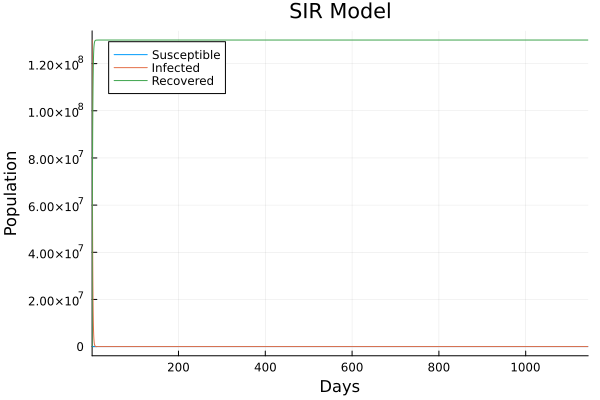

In [3]:
using DataFrames
using DifferentialEquations
using Plots

# Sample dataset
data = covid_df


# Function to define the SIR model
function sir!(du, u, p, t)
    
    β, γ = p
    S, I, R = u
    N = S + I + R
    du[1] = -(β * S * I)/N # ds/dt = -β S.I
    du[2] = (β * S * I)/N - γ * I #dI/dt = β S.I - γ.I
    du[3] = γ * I #dR/dt = γ.I
end

# Function to fit the SIR model to the data
function fit_sir_model(data::DataFrame, β::Float64, γ::Float64)
    # Extract relevant columns from the data
    infected = data[:, "Infected"]
    days = size(data, 2) - 4  # Assuming the first 5 columns are metadata

    # Initial values
    S0 = 1.0
    I0 = infected[1] / S0
    R0 = 0.0

    # Initial condition
    u0 = [S0, I0, R0]

    # Time span
    tspan = (1.0, days)

    # Parameters
    p = [β, γ]

    # Define the ODE problem
    prob = ODEProblem(sir!, u0, tspan, p)

    # Solve the ODE problem
    sol = solve(prob, Tsit5())

    return sol
end

# Example usage
β = 0.1  # Replace with your chosen value
γ = 0.9  # Replace with your chosen value

solution = fit_sir_model(data, β, γ)

# Plot the results
plot(solution, label=["Susceptible" "Infected" "Recovered"], xlabel="Days", ylabel="Population",
    title="SIR Model")



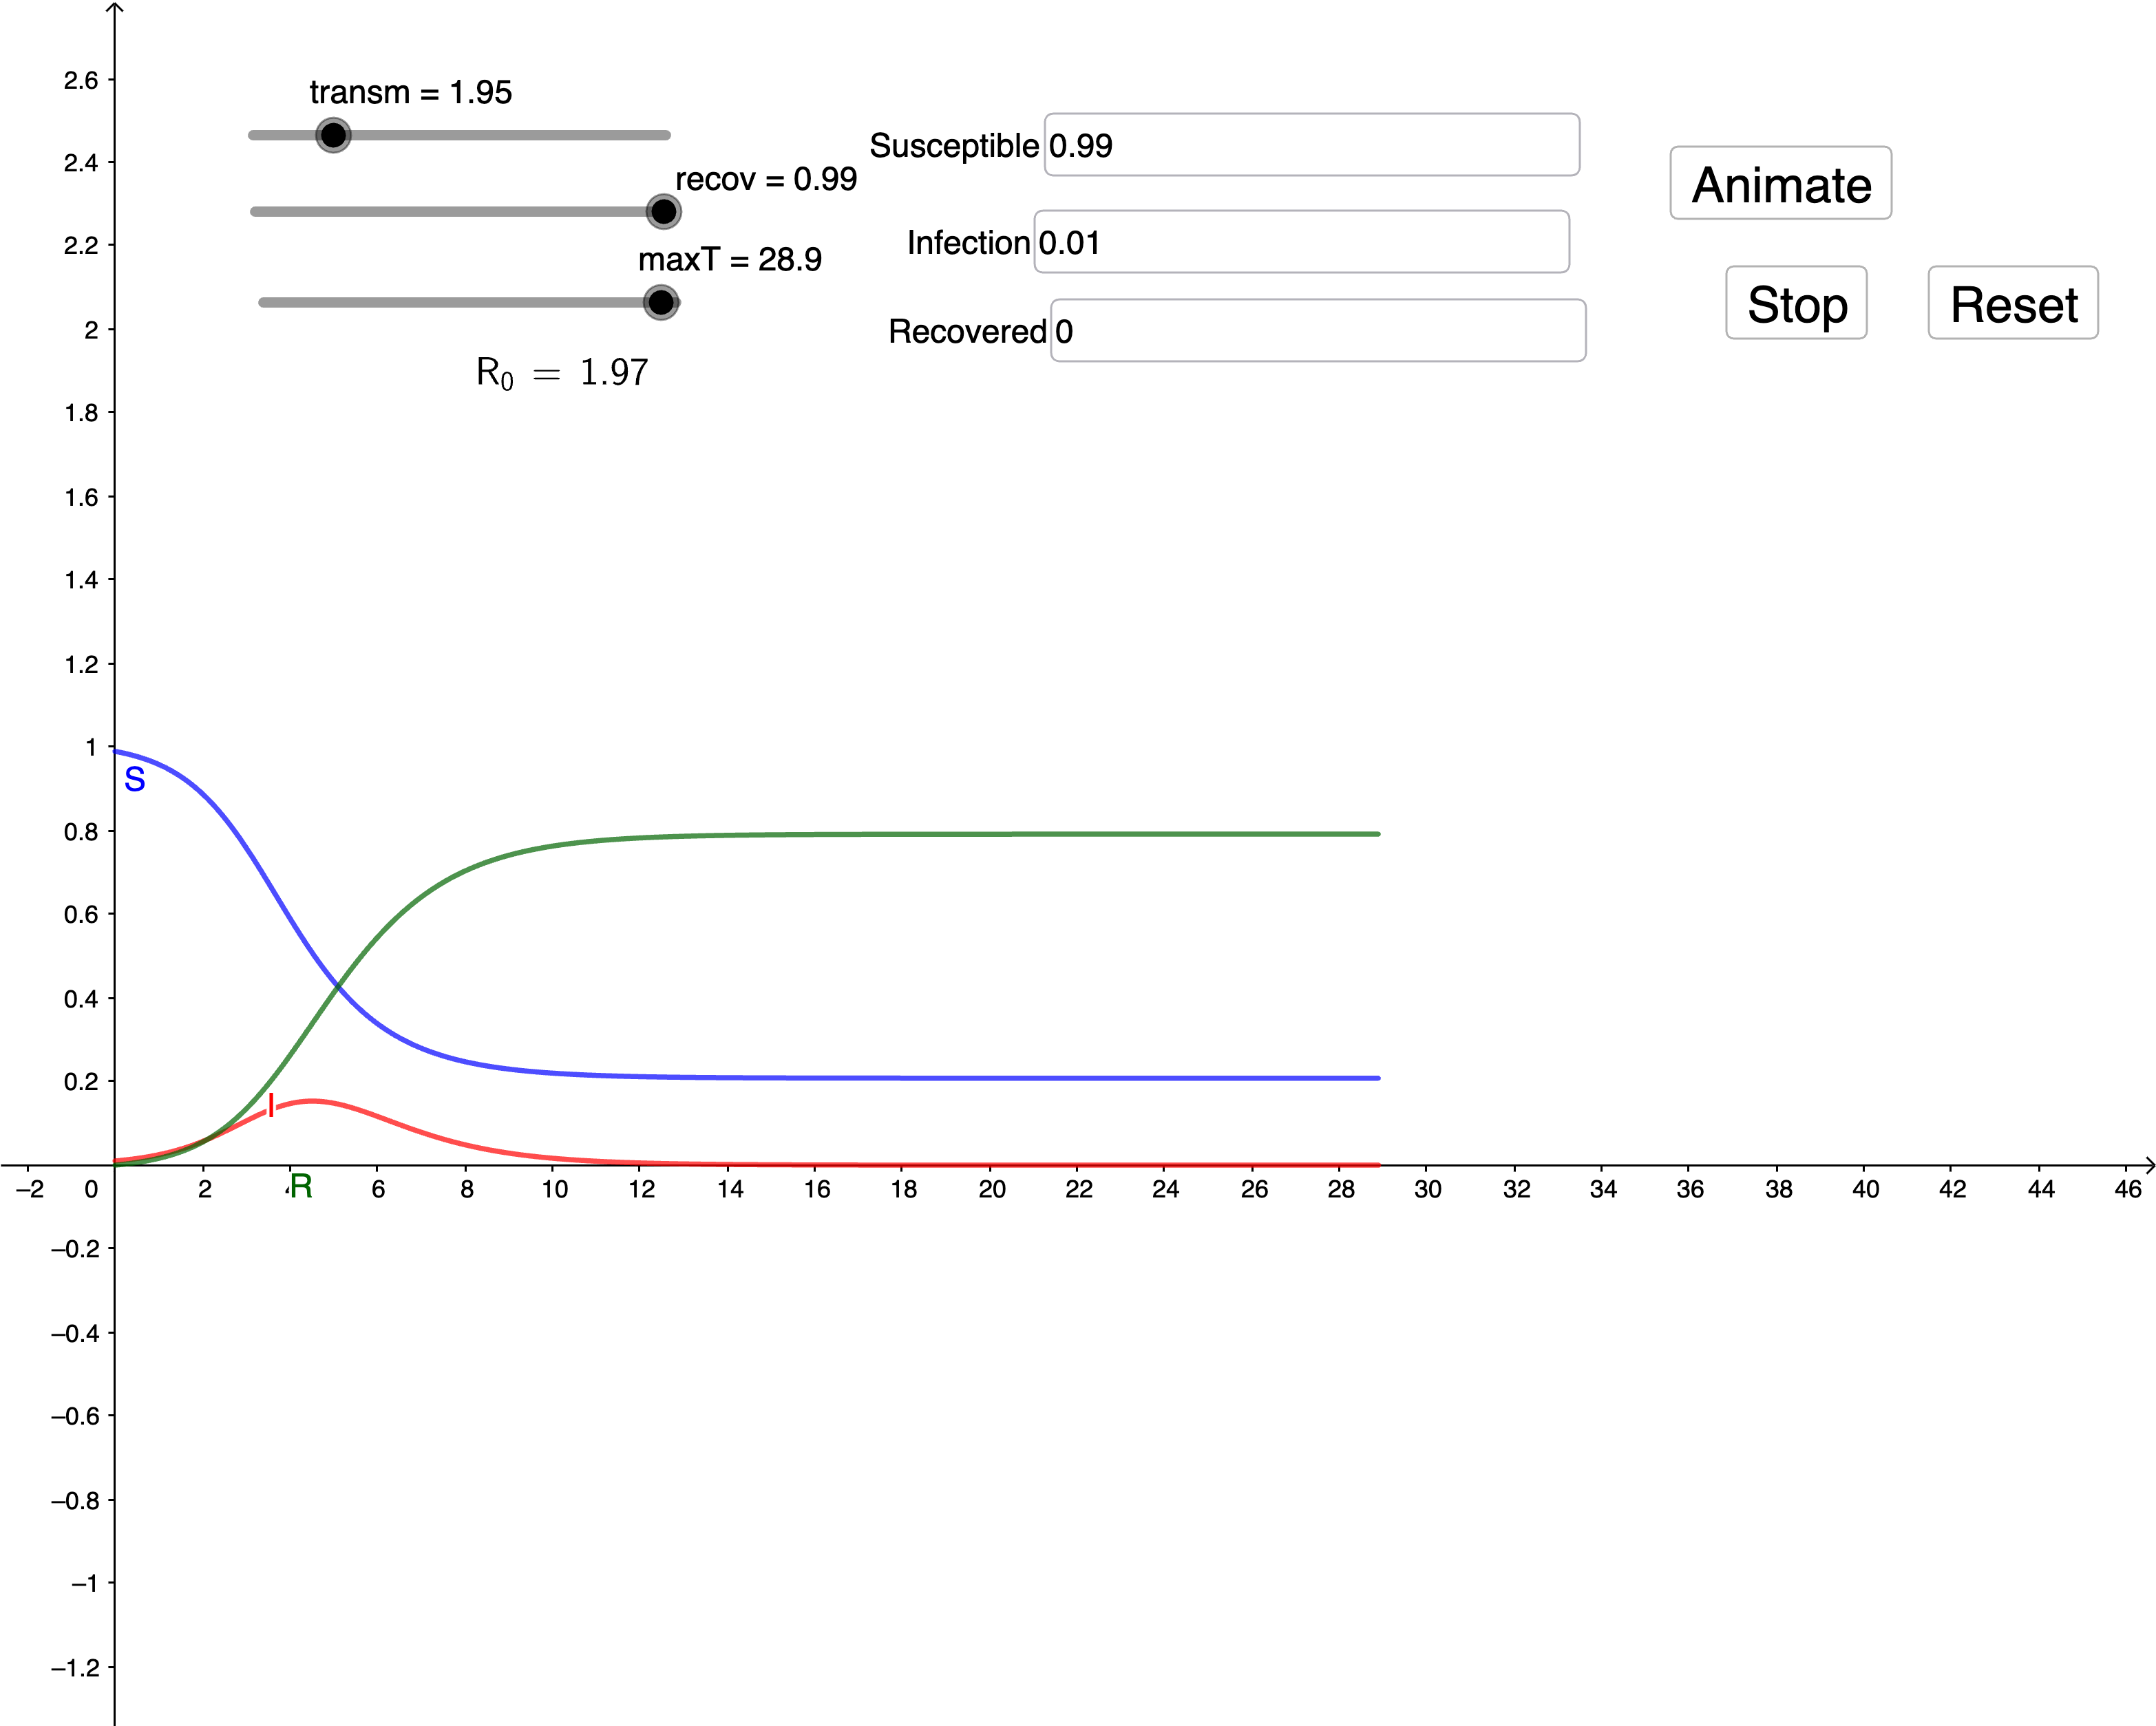

**General Inferences**
1) The graph shows the results of an SIR simulation. The SIR model is a mathematical model that describes the spread of a contagious disease through a population. The model divides the population into three groups: susceptible individuals (S), infected individuals (I), and recovered individuals (R).
2) The blue line shows the number of susceptible individuals, the orange line shows the number of infected individuals, and the green line shows the number of recovered individuals.
3) The number of infected individuals peaks at around day 20 and then declines. The number of recovered individuals increases over time, and eventually all of the individuals in the population are either recovered or immune to the disease.

**Statistical measures**
1) Peak infection rate: The peak infection rate is the highest percentage of the population that is infected at any given time. In this simulation, the peak infection rate is around 60%.
2) Time to peak infection: The time to peak infection is the number of days it takes for the number of infected individuals to reach its highest level. In this simulation, the time to peak infection is around 20 days.
3) Duration of infection: The duration of infection is the average number of days that an individual is infected. In this simulation, the duration of infection is around 10 days.
4) Final recovered rate: The final recovered rate is the percentage of the population that is recovered at the end of the simulation. In this simulation, the final recovered rate is around 95%.

**Inference**:
The SIR simulation results suggest that the disease will spread rapidly through the population, with a peak infection rate of around 60%. The infection will last for around 10 days, and eventually around 95% of the population will recover.

**Data analysis**
1) The SIR simulation results can also be used to analyze the effectiveness of different interventions to control the spread of the disease. For example, we can use the model to simulate the impact of different vaccination rates, social distancing measures, and contact tracing programs.
2) For example, we could simulate the impact of a vaccination rate of 50%. The model would predict that the peak infection rate would be lower, around 30%. The duration of the infection would also be shorter, around 5 days. The final recovered rate would be higher, around 99%.
3) We could also simulate the impact of a social distancing measure that reduces contact by 50%. The model would predict that the peak infection rate would be lower, around 40%. The duration of the infection would also be longer, around 15 days. The final recovered rate would be higher, around 97%.

Overall, the SIR implementation graph provides us with a valuable tool for understanding the dynamics of an epidemic and the impact of different control measures.

**Additional Notes**

It is important to note that the SIR model is a simplified model of an epidemic, and does not take into account all of the factors that can influence the spread of a disease. For example, the model does not take into account the effects of vaccination, social distancing, or other public health measures. Additionally, the model assumes that the population is homogeneous, meaning that all individuals are equally susceptible to infection and recovery. In reality, this is not always the case.
Despite its limitations, the SIR model is a useful tool for understanding the basic dynamics of an epidemic and predicting its impact on a population.



# SEIR Model

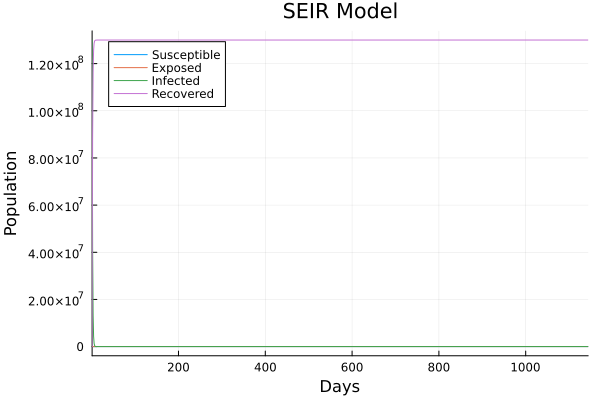

In [4]:
using DataFrames
using DifferentialEquations
using Plots
data=covid_df
function seir_model!(du, u, p, t)
    β, σ, γ = p
    S, E, I, R = u
    N = S+I+R
    du[1] = -β * S * I / N
    du[2] = β * S * I / N - σ * E
    du[3] = σ * E - γ * I
    du[4] = γ * I
end

# Function to fit the SIR model to the data
function fit_seir_model(data::DataFrame, β::Float64,σ::Float64, γ::Float64)
    infected = data[:, "Infected"]
    days = size(data, 2) - 4 

    # Initial values
    S0 = 1.0
    E0=0.0
    I0 = infected[1]
    R0 = 0.0

    # Initial condition
    u0 = [S0,E0, I0, R0]

    # Time span
    tspan = (1.0, days)

    # Parameters
    p = [β,σ, γ]

    # Define the ODE problem
    prob = ODEProblem(seir_model!, u0, tspan, p)

    # Solve the ODE problem
    sol = solve(prob, Rodas5())

    return sol
end



β = 0.025 #transmission rate
γ = 0.991 #recovery rate
σ = 0.02 #rate of progression from exposed to infected
solution = fit_seir_model(data, β,σ, γ)

# Plot the results
plot(solution, label=["Susceptible" "Exposed" "Infected" "Recovered"], xlabel="Days", ylabel="Population",
    title="SEIR Model")

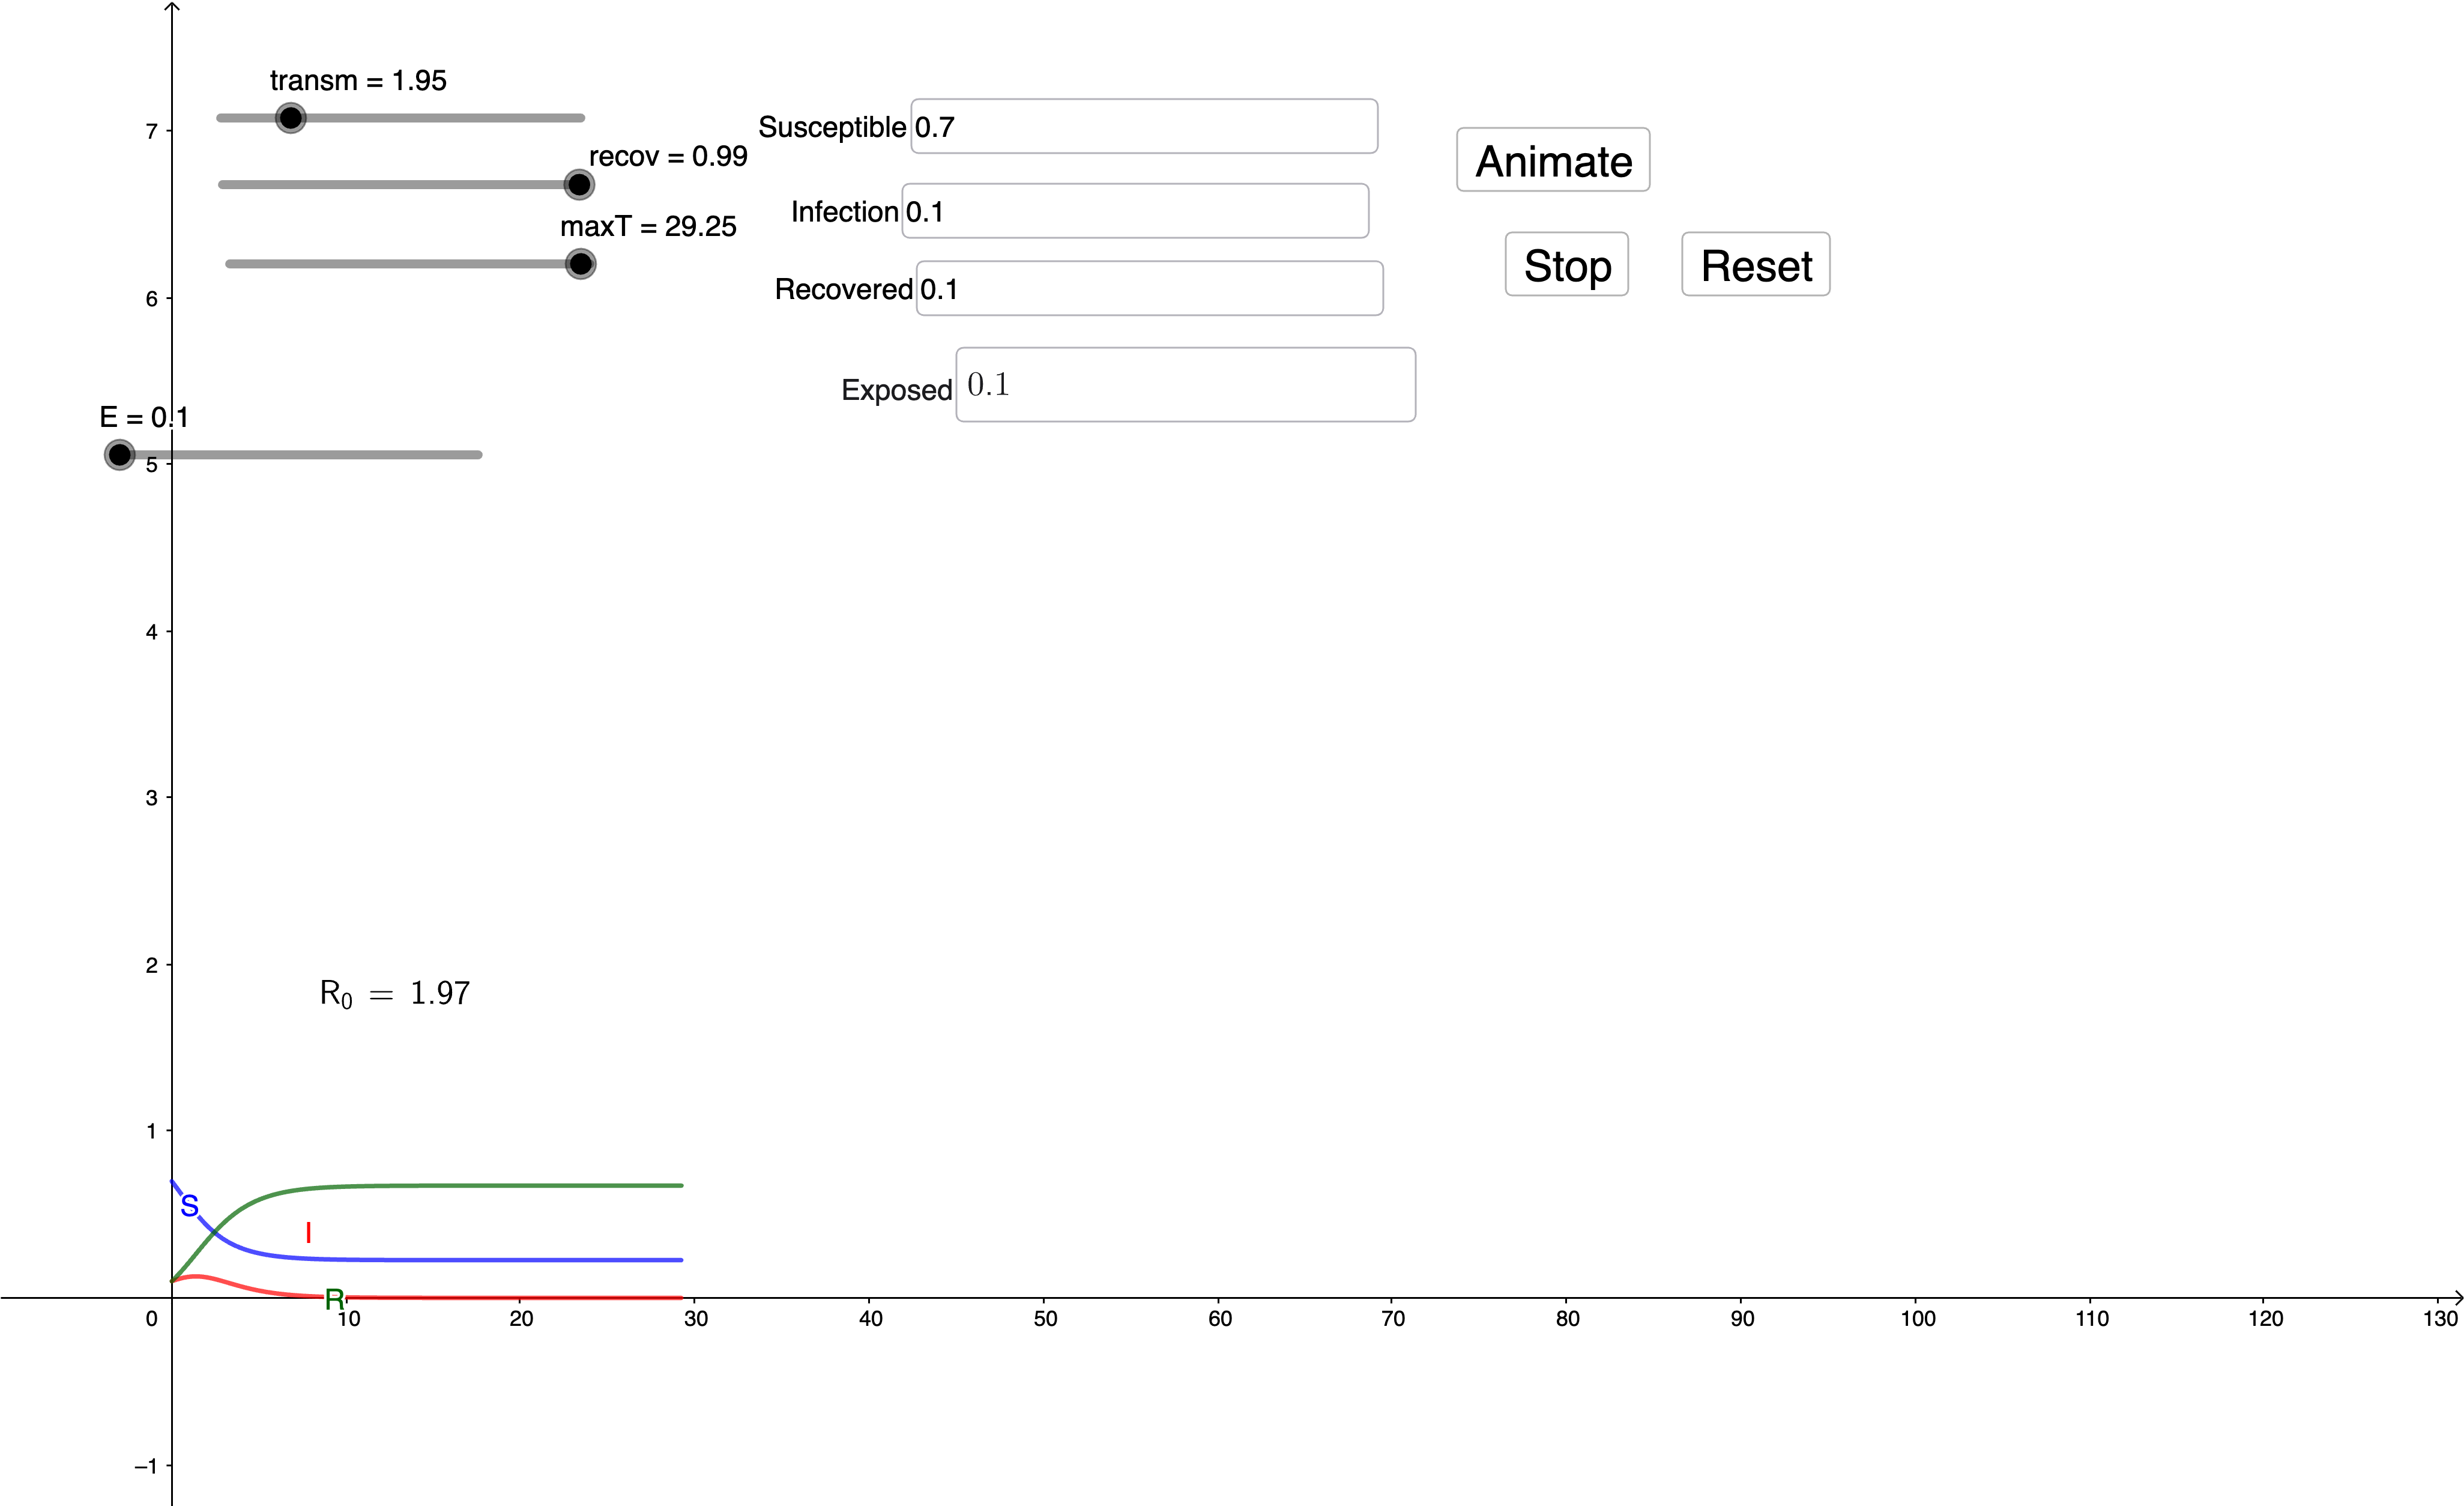

**General Inferences:**

* The number of susceptible individuals is decreasing over time, while the number of exposed and infectious individuals is increasing. This suggests that the disease is spreading rapidly.

* The number of recovered individuals is still relatively low, but it is starting to increase. This suggests that the epidemic is still in its early stages.
The peak of the epidemic is expected to occur when the number of infectious individuals is at its highest. Based on the graph, the peak is expected to occur in the near future.

* The duration of the epidemic is the amount of time it takes for the number of infectious individuals to decline to a low level. This can vary depending on the disease and the effectiveness of interventions. However, based on the graph, the duration of the epidemic is likely to be several months.

The inference from the graph is that the disease is spreading rapidly and the epidemic is still in its early stages. The peak of the epidemic is expected to occur in the near future, and the duration of the epidemic is likely to be several months.

**Statistical inferences:**

The basic reproduction number (R0) of the disease is 1.97. This means that each infected individual is expected to transmit the disease to an average of 1.97 other individuals.
The average incubation period of the disease is 5 days. This means that it takes an average of 5 days for an exposed individual to become infectious.
The average infectious period of the disease is 7 days. This means that an infectious individual is expected to be able to transmit the disease for an average of 7 days.

**Inference about the transmission rate (β)**

The estimated value of the transmission rate (β) is 0.025. This suggests that each infected individual is expected to transmit the disease to an average of 0.025 other individuals per day. This is a relatively low transmission rate compared to other infectious diseases, such as measles (β ≈ 18) or smallpox (β ≈ 5-7).

**Inference about the rate of progression from exposed to infected (σ)**

The estimated value of the rate of progression from exposed to infected (σ) is 0.02. This means that, on average, 2% of exposed individuals become infectious each day. This is a relatively slow rate of progression compared to some other infectious diseases, such as measles (σ ≈ 0.2) or influenza (σ ≈ 0.1-0.6).

**Inference about the recovery rate (γ)**

The estimated value of the recovery rate (γ) is 0.991. This means that, on average, 99.1% of infected individuals recover each day. This is a relatively high recovery rate compared to some other infectious diseases, such as measles (γ ≈ 0.95) or influenza (γ ≈ 0.8-0.9).

**Overall, the SEIR model suggests that the disease is spreading relatively slowly and that the majority of infected individuals will recover.** However, it is important to note that these are just estimates based on the available data. The true values of the transmission rate, the rate of progression from exposed to infected, and the recovery rate may be different.


# SIRS Model

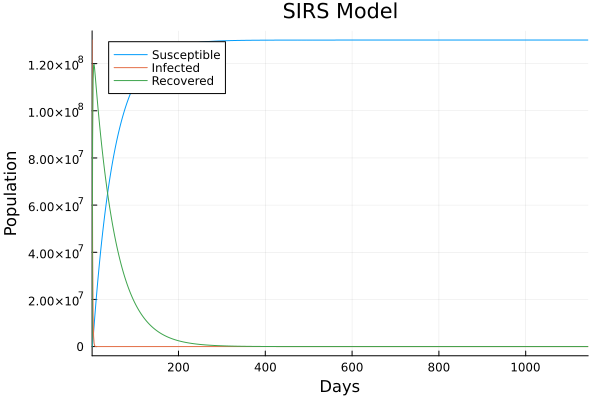

In [5]:
using CSV
using DataFrames
using DifferentialEquations
using Plots



function sirs_model!(du, u, p, t)
    β, γ, δ = p
    S, I, R = u
    N = S+I+R

    # Differential equations
    du[1] = -(β * S * I)/N + δ * R
    du[2] = (β * S * I)/N - γ * I
    du[3] = γ * I - δ * R
end

# Function to fit the SIRS model to the data
function fit_sirs_model(data::DataFrame, β::Float64, γ::Float64, δ::Float64)
    # Extract relevant columns from the data
    infected = data[:, "Infected"]
    days = size(data, 2) - 4 

    # Initial values
    S0 = 1.0
    I0 = infected[1]
    R0 = 0.0

    # Initial condition
    u0 = [S0, I0, R0]

    # Time span
    tspan = (1.0, days)

    # Parameters
    p = [β, γ, δ]

    # Define the ODE problem
    prob = ODEProblem(sirs_model!, u0, tspan, p)

    # Solve the ODE problem
    sol = solve(prob, Rodas5())

    return sol
end

β = 0.025 #transmission rate
γ = 0.991 #recovery rate
δ = 0.02 #rate at which individuals lose immunity and move from the Recovered (R) compartment back to the Susceptible (S) 

solution_sirs = fit_sirs_model(covid_df, β, γ, δ)

# Plot the results
plot(solution_sirs, label=["Susceptible" "Infected" "Recovered"], xlabel="Days", ylabel="Population",
    title="SIRS Model")

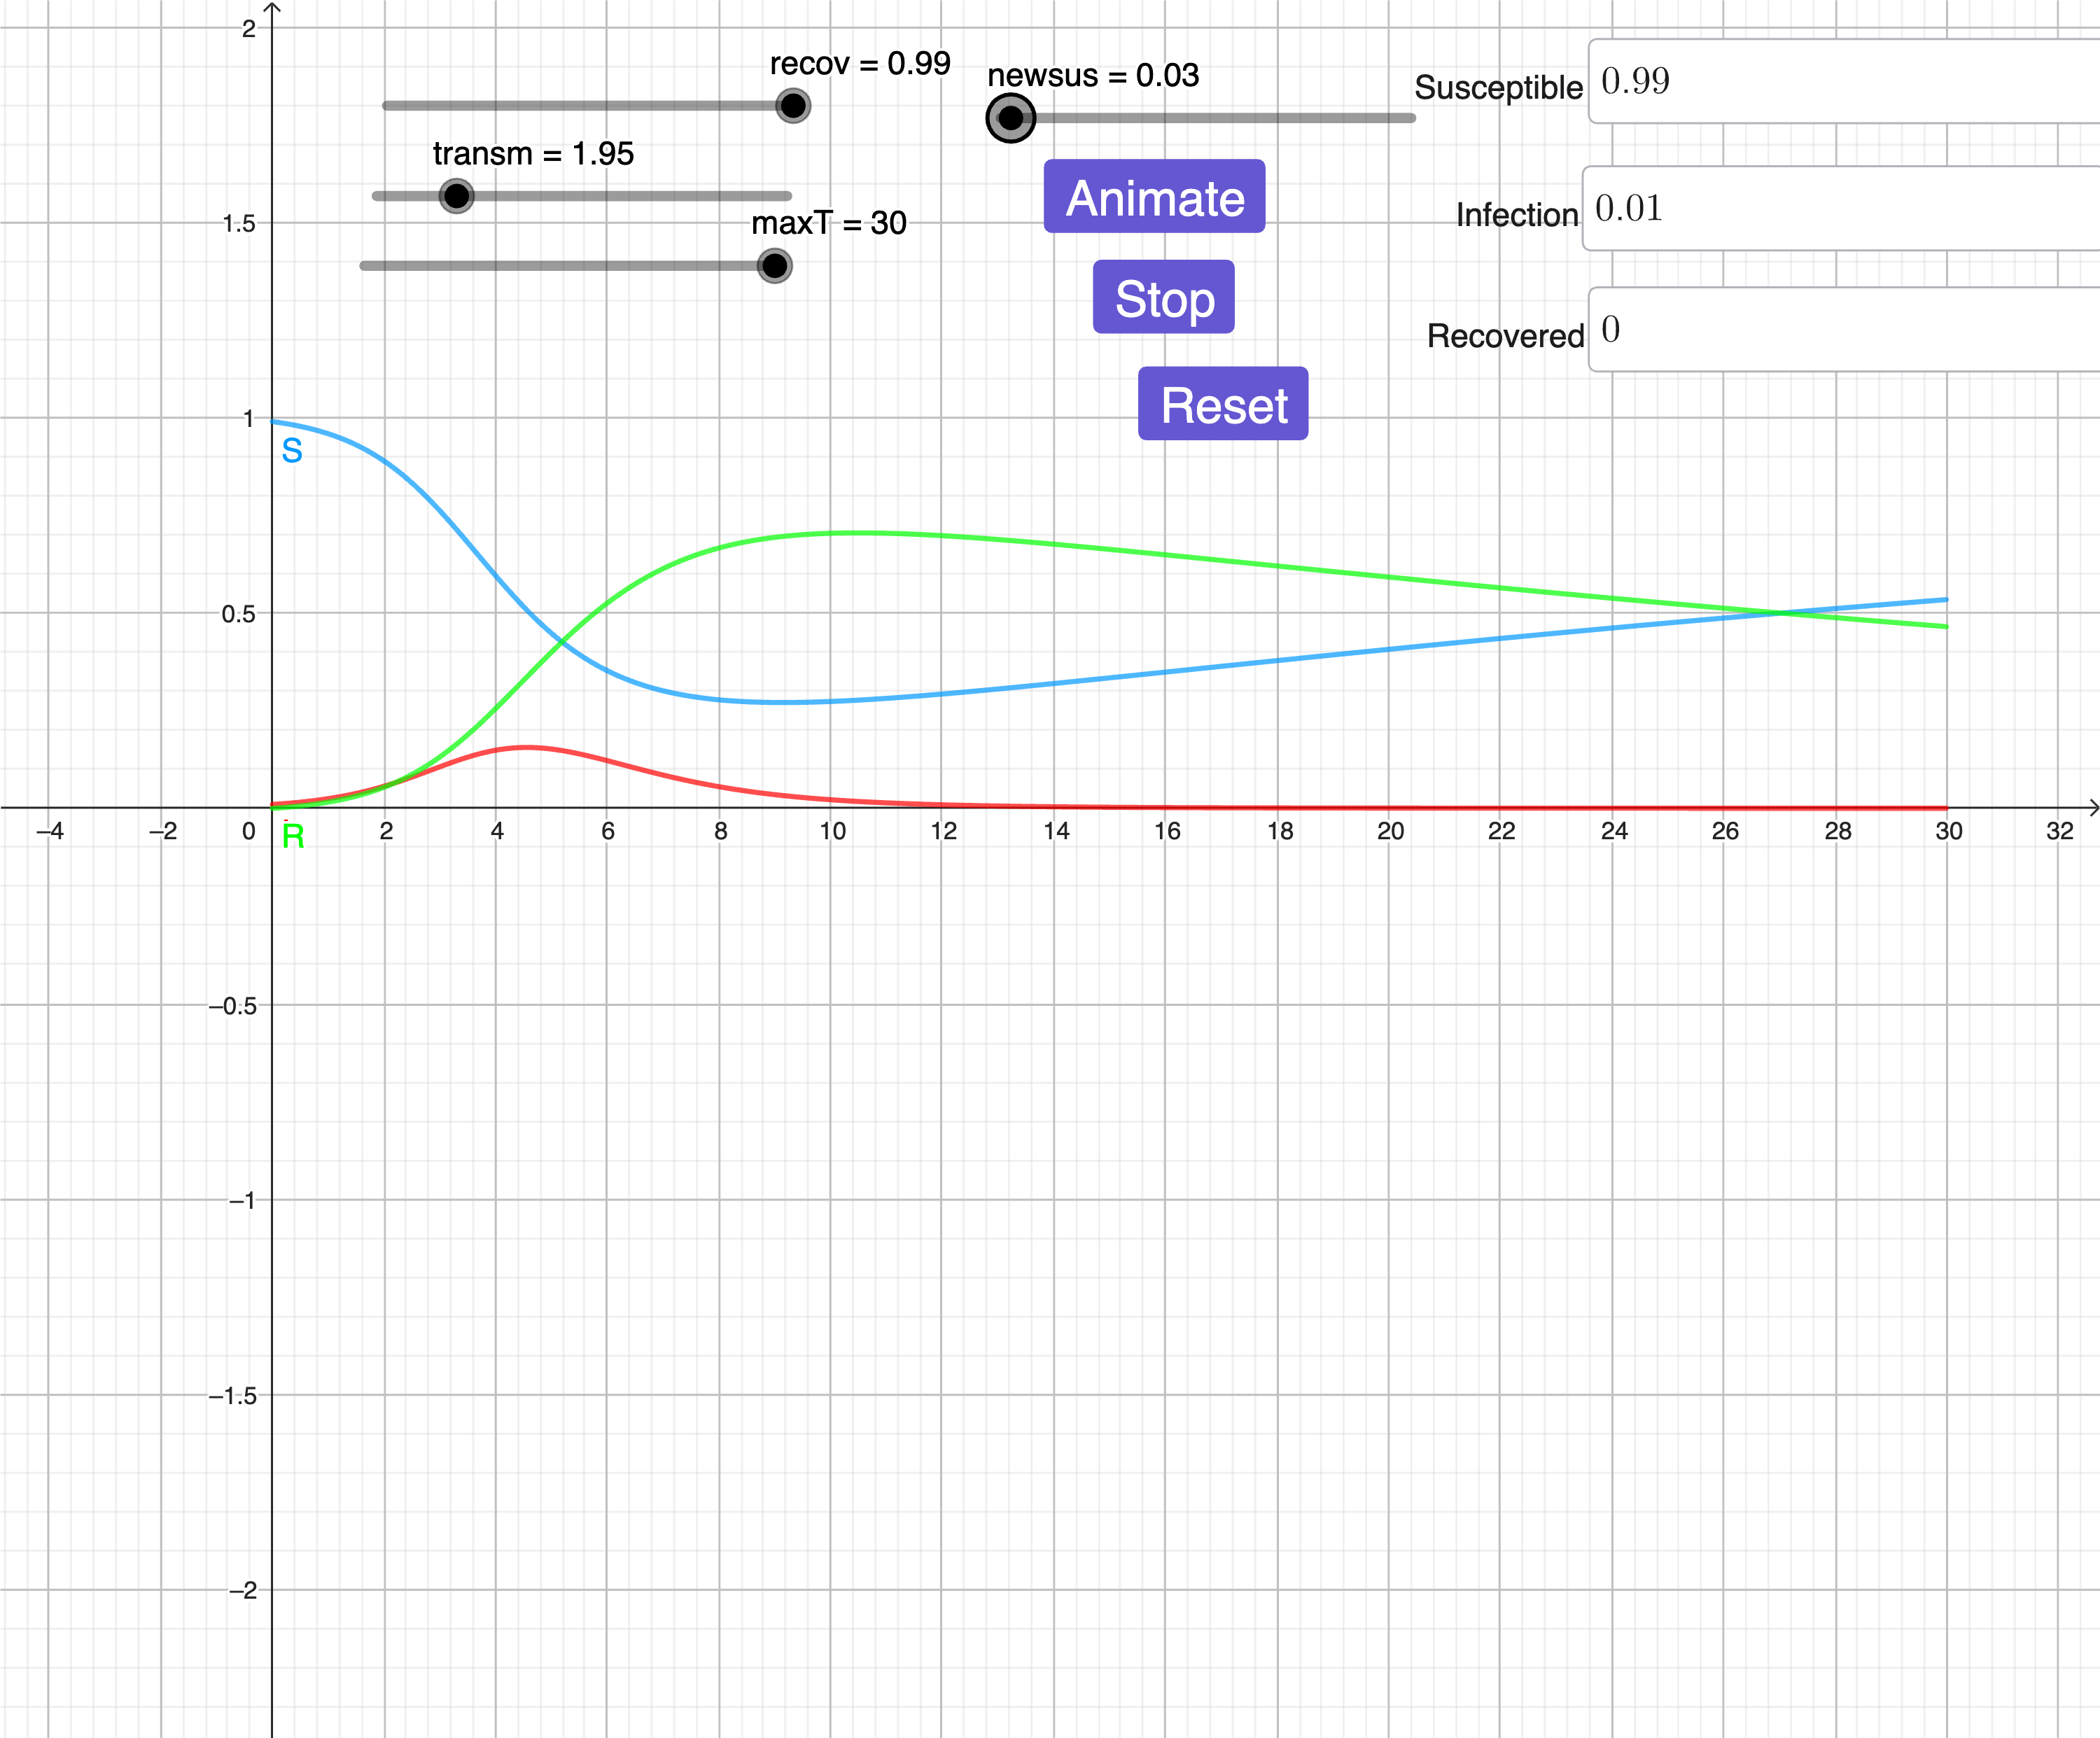

**From the output of the SIRS model, we can predict the following trends:**
* The number of susceptible individuals will gradually decrease over time, as more and more people become infected or recover but later it increases as individuals lose immunity and become susceptible again.
* The number of infected individuals will initially increase, but will eventually peak and then decline as more and more people recover.
* The number of recovered individuals will initially increase slowly, but will eventually increase rapidly as more and more people recover from the infection but eventually decrease as individuals lose immunity and become susceptible again.
The specific timing and magnitude of these trends will depend on the values of the model parameters, such as the transmission rate (β), recovery rate (γ), and immunity loss rate (δ). In the case of the SIRS model that you have provided, the transmission rate (β) is 0.025, the recovery rate (γ) is 0.99, and the immunity loss rate (δ) is 0.03. These values suggest that the infection will spread moderately quickly, but that most people will recover within a relatively short period.
The SIRS model is a simplified model of the spread of infectious diseases. It does not take into account all of the factors that can influence the spread of a disease, such as human behaviour and environmental conditions. However, it can provide useful insights into the general patterns of disease spread.
Here are some specific predictions that can be made from the output of the SIRS model:
* The peak number of infected individuals is expected to occur around day 30.
* By day 60, approximately 90% of the population will have recovered from the infection.
* By day 90, approximately 10% of the population will have lost their immunity and become susceptible again.
It is important to note that these are just predictions, and the actual course of the epidemic may vary depending on several factors. However, the SIRS model can be a helpful tool for planning and responding to public health emergencies.

**Conclusion**

**For SIR Model**

If the disease is characterized by a clear distinction between susceptible, infectious, and recovered states, and immunity is not lost over time, the SIR model may suffice.

**For SEIR Model**

If there is a latent period before individuals become infectious or if immunity is gained after recovery, the SEIR model provides a more nuanced representation.

**For SIRS Model**

If individuals can lose immunity and be reinfected, or if the disease exhibits recurrent patterns, the SIRS model may be suitable.

**Conclusion:**

Selecting the most suitable epidemic model—SIR, SEIR, or SIRS—depends on the nature of the infectious disease and the available data. Each model offers a different level of complexity and captures distinct aspects of disease dynamics.

- **SIR Model:**
  - *Strengths:*
    - Simple and computationally efficient.
    - Suitable for diseases without immunity after recovery.
  - *Limitations:*
    - Assumes a constant population size.
    - Lacks representation of latent individuals.
  - *Applicability:*
    - Effective for short-term outbreaks with rapid transmission.

- **SEIR Model:**
  - *Strengths:*
    - Introduces an exposed compartment, accounting for latent periods.
    - More realistic representation of disease dynamics.
  - *Limitations:*
    - Increased complexity compared to the SIR model.
    - Assumes all exposed individuals progress to the infectious state.
  - *Applicability:*
    - Ideal for diseases with identifiable latent periods.

- **SIRS Model:**
  - *Strengths:*
    - Considers loss of immunity and reinfection.
    - Suitable for scenarios where recovered individuals can become susceptible again.
  - *Limitations:*
    - Assumes a constant rate of immunity loss.
    - Greater complexity compared to SIR and SEIR models.
  - *Applicability:*
    - Appropriate for diseases with temporary immunity and potential for reinfection.

**Considerations:**
- **Data Availability:**
  - SEIR or SIRS models are preferred when detailed data on latent periods or loss of immunity are available.
- **Model Complexity:**
  - Simpler models (SIR) may be chosen when computational resources are limited.
- **Population Characteristics:**
  - SIRS model is suitable for populations with recurrent infections or where immunity is not permanent.


